In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [2]:
movies_data = pd.read_csv('my_movies.csv')
movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies_data.shape

(10, 15)

In [4]:
movie_data2= movies_data.copy()

In [5]:
movie_data2.drop(labels=['V1','V2','V3','V4','V5'], axis =1,inplace=True)

In [6]:
movie_data2.describe(include='all')

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
movie_data2.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

#### Preparing the data according to the Apriori Algorithm Expectation

**2% Support , 20% confidence**

In [51]:
frequent_item_sets_1 = apriori(df =movie_data2 ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [52]:
rules1=association_rules(df = frequent_item_sets_1 ,metric='confidence',min_threshold=0.20,)

In [53]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
215,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
216,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
217,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
218,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


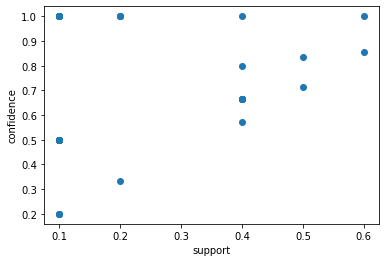

In [54]:
# visualization of obtained rule
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**2% Support , 40% confidence**

In [55]:
frequent_item_sets_2 = apriori(df =movie_data2 ,min_support=0.02, use_colnames=True,max_len=6) #Frequent itemsets
frequent_item_sets_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [56]:
rules2=association_rules(df = frequent_item_sets_2 ,metric='confidence',min_threshold=0.40,)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


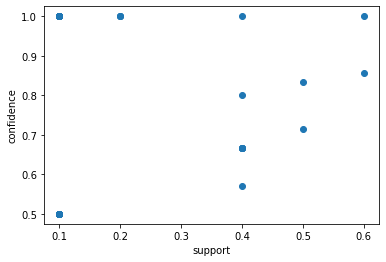

In [57]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**4% Support , 50% confidence**

In [58]:
frequent_item_sets_3 = apriori(df =movie_data2 ,min_support=0.04, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [59]:
rules3=association_rules(df = frequent_item_sets_3 ,metric='confidence',min_threshold=0.50,)

In [60]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
182,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
183,(LOTR1),"(Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
184,(LOTR2),"(LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
185,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


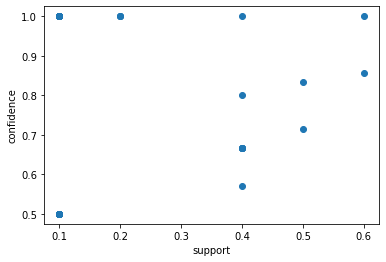

In [61]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**7% Support , 50% confidence**

In [62]:
frequent_item_sets_4 = apriori(df =movie_data2 ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [63]:
rules4=association_rules(df = frequent_item_sets_4 ,metric='confidence',min_threshold=0.50,)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
182,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
183,(LOTR1),"(Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
184,(LOTR2),"(LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
185,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


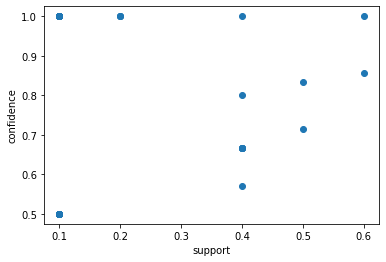

In [64]:
# visualization of obtained rule
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**10% Support , 80% confidence**

In [66]:
frequent_item_sets_5 = apriori(df =movie_data2 ,min_support=0.10, use_colnames=True,max_len=5) #Frequent itemsets
frequent_item_sets_5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [67]:
rules5=association_rules(df = frequent_item_sets_1 ,metric='confidence',min_threshold=0.90)

In [68]:
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


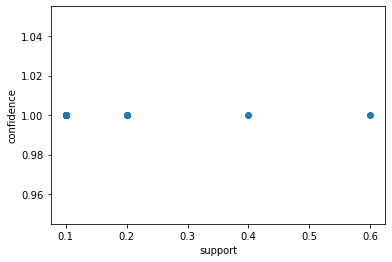

In [69]:
# visualization of obtained rule
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**7% Support , 90% confidence**

In [73]:
frequent_item_sets_6 = apriori(df =movie_data2 ,min_support=0.07, use_colnames=True,max_len=4) #Frequent itemsets
frequent_item_sets_6

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [74]:
rules6=association_rules(df = frequent_item_sets_6 ,metric='confidence',min_threshold=0.90,)

In [75]:
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
97,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
98,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
99,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
100,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


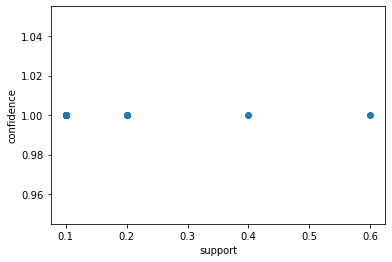

In [76]:
# visualization of obtained rule
plt.scatter(rules6['support'],rules6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

So From Above 6 cases we observed that,
1.	Lower the Confidence level Higher the no. of rules and vice-versa
2.	Higher the Support, lower the no. of rules.
3.  Higher the max length , higher the noo.of rules
4.	So, we can conclude that these 3 parameters different combinations can generate different rules.
